In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
# Para series de tiempo
import statsmodels.api as sm
import numpy as np

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed


import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


from prophet import Prophet

#
from warnings import catch_warnings
from warnings import filterwarnings

%matplotlib inline








### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [3]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)

Se observan los tipos de datos que hay en el dataframe

In [4]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [6]:
df.isnull().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la izquierda

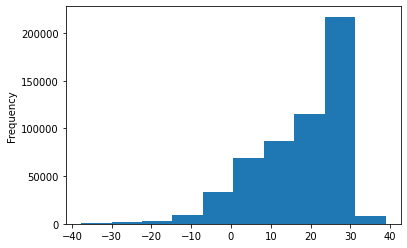

In [7]:
df['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

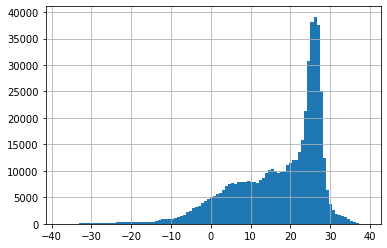

In [8]:
df['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 20 y 30. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 20013

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

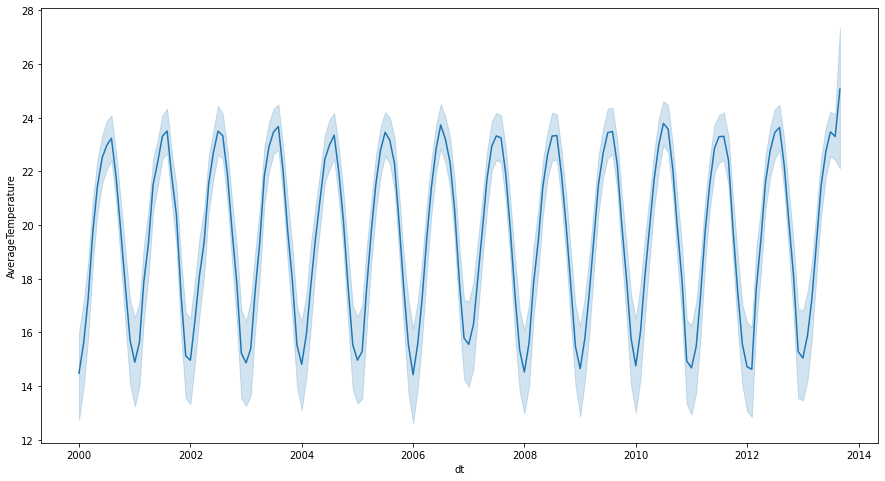

In [3]:
series = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)

# Eliminamos la columna de AverageTemperatureUncertainty
temp = series.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Comentario.** No se graficaron todos los años en una gráfica, por la gran cantidad de datos, la capacidad de nuestro ordenador no fue suficiente.

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

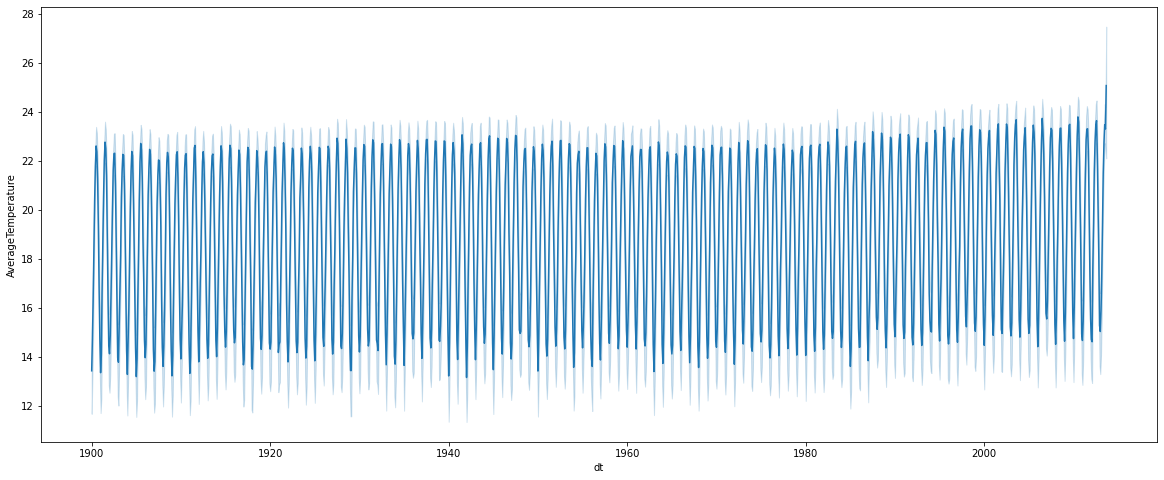

In [4]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


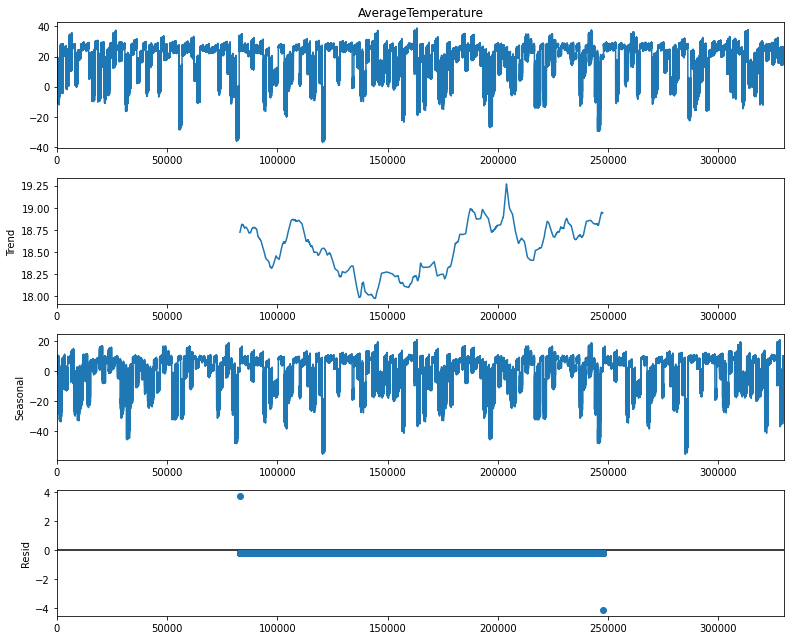

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [11]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=164409)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [7]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [8]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [9]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [10]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [11]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [12]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [13]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
sar = mundial[["dt","AverageTemperature"]]
sar = sar.groupby(["dt"]).mean()
sar

,AverageTemperature
dt,
2010-01-01,14.884364
2010-02-01,16.283107
2010-03-01,18.270760
2010-04-01,20.127421
2010-05-01,21.874174
2010-06-01,23.082099
2010-07-01,23.899364
2010-08-01,23.677339
2010-09-01,22.260446


In [14]:

nombre = 'AverageTemperature'
encontrar_mejor_solucion(sar, nombre, metodo = "sarima")


Tamaño Entrenamiento 42
Tamaño Prueba 3
Encontrando la mejor solución para sarima


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [19]:
df2 = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [20]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

,ds
76,2016-05-01
77,2016-06-01
78,2016-07-01
79,2016-08-01
80,2016-09-01


Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2016-05-01,22.044214,21.473403,22.630269
77,2016-06-01,23.170340,22.583641,23.725494
78,2016-07-01,23.912832,23.351093,24.531911
79,2016-08-01,23.929102,23.325569,24.555299
80,2016-09-01,22.771931,22.127316,23.365535


Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

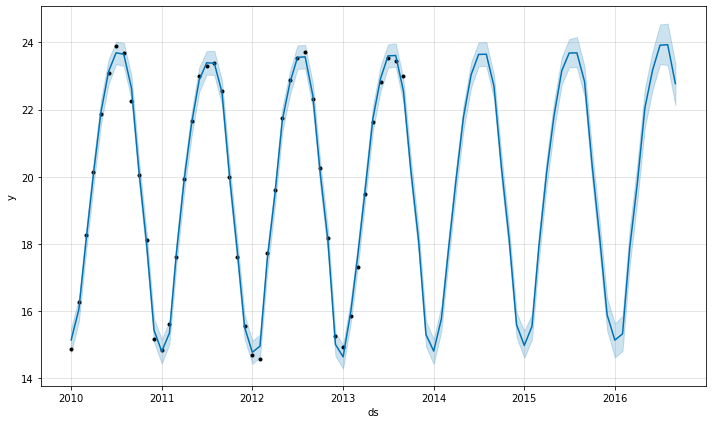

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

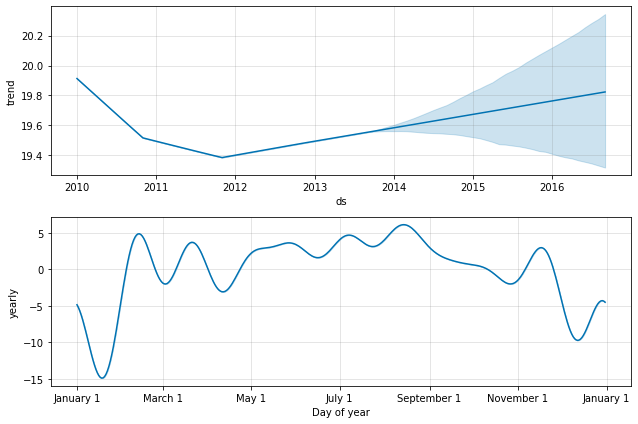

In [26]:
mi_modelo.plot_components(prediccion);

### 3. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción.

### 4. Haga una predicción, tres años al futuro, usando los años anteriores y determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 5. Basado en los resultados obtenidos, diría Ud que hay evidencia para corroborar la tan discutida aseveración de que el Cambio Climático y el Calentamiento Global es real

### 6. Repita los 5 pasos anteriores pero esta vez solo utilizando los datos para Guatemala.

In [27]:
gt = df['Country'] == 'Guatemala'
gua = df[gt]

In [28]:
gua.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

### a. Especifique Inicio, fin, y frecuencia. 


### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

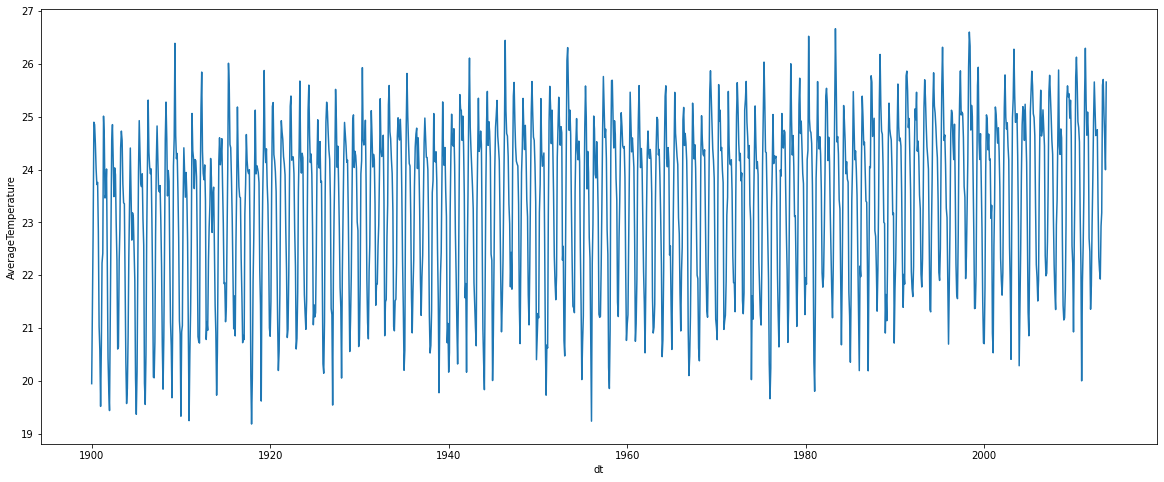

In [29]:


gt = temp2['Country'] == 'Guatemala'
tempGt = temp2[gt]


# Ultimos 100 años


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = tempGt)

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


Se descompone la serie en sus somponentes y al analizar la grafica se puede ver una tendencia estacional, asi como un incremento de la temperatura en los ultimos años.


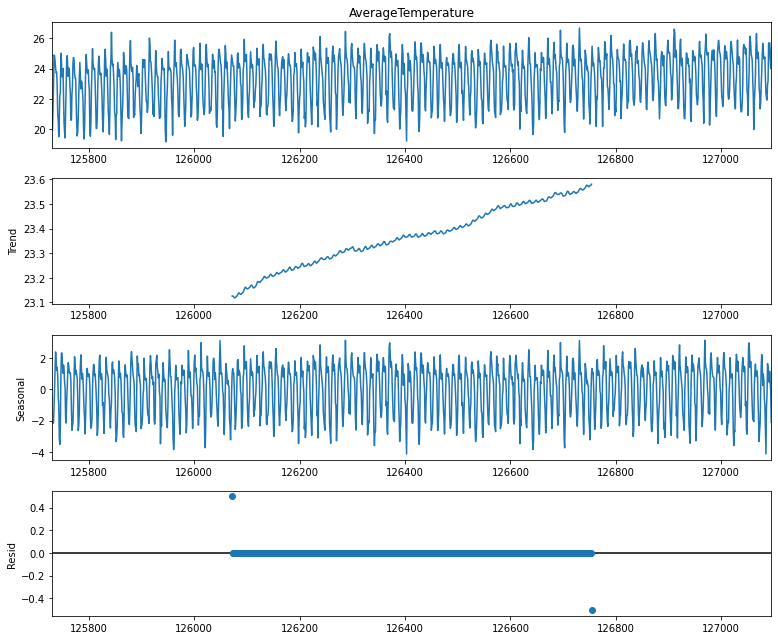

In [30]:
tempGt2 = tempGt

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(tempGt2['AverageTemperature'],model='additive', period=682)
                                                  
fig = decomposition.plot()


### d. Determine si es necesario transformar la serie. Explique. 


### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [20]:
temp


,dt,AverageTemperature,Country
0,1900-01-01,-3.026,Åland
1,1900-02-01,-8.063,Åland
2,1900-03-01,-3.196,Åland
3,1900-04-01,0.781,Åland
4,1900-05-01,4.960,Åland
...,...,...,...
329862,2013-04-01,21.142,Zimbabwe
329863,2013-05-01,19.059,Zimbabwe
329864,2013-06-01,17.613,Zimbabwe
329865,2013-07-01,17.000,Zimbabwe


In [ ]:
prueba

In [ ]:
prueba.plot(figsize=(16,10))

In [22]:
temp2

,dt,AverageTemperature,Country
0,1900-01-01,-3.026,Åland
1,1900-02-01,-8.063,Åland
2,1900-03-01,-3.196,Åland
3,1900-04-01,0.781,Åland
4,1900-05-01,4.960,Åland
...,...,...,...
329863,2013-05-01,19.059,Zimbabwe
329864,2013-06-01,17.613,Zimbabwe
329865,2013-07-01,17.000,Zimbabwe
329866,2013-08-01,19.759,Zimbabwe


In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp1['AverageTemperature'], model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)

In [15]:
temp1

,dt,AverageTemperature,Country
0,2000-01-01,0.197,Åland
1,2000-02-01,-0.023,Åland
2,2000-03-01,0.615,Åland
3,2000-04-01,4.124,Åland
4,2000-05-01,8.557,Åland
...,...,...,...
40090,2013-05-01,19.059,Zimbabwe
40091,2013-06-01,17.613,Zimbabwe
40092,2013-07-01,17.000,Zimbabwe
40093,2013-08-01,19.759,Zimbabwe


# Guatemala








### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [15]:
df_Guatemala = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)
df_Guatemala = df_Guatemala[df_Guatemala['Country'] == 'Guatemala']
df_Guatemala

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1825-01-01,21.204,1.770,Guatemala
1825-02-01,21.584,1.374,Guatemala
1825-03-01,23.038,1.704,Guatemala
1825-04-01,25.276,1.923,Guatemala
1825-05-01,24.995,1.276,Guatemala
...,...,...,...
2013-05-01,25.704,0.461,Guatemala
2013-06-01,25.048,0.403,Guatemala
2013-07-01,24.588,0.316,Guatemala


Se observan los tipos de datos que hay en el dataframe

In [17]:
df_Guatemala.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1825-01-01,21.204,1.770,Guatemala
1825-02-01,21.584,1.374,Guatemala
1825-03-01,23.038,1.704,Guatemala
1825-04-01,25.276,1.923,Guatemala
1825-05-01,24.995,1.276,Guatemala


In [18]:
df_Guatemala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2265 entries, 1825-01-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2226 non-null   float64
 1   AverageTemperatureUncertainty  2226 non-null   float64
 2   Country                        2265 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.8+ KB


In [19]:
profile = ProfileReport(df_Guatemala)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [20]:
df_Guatemala.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la derecha

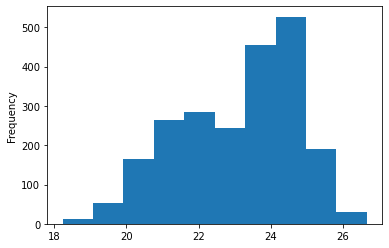

In [21]:
df_Guatemala['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

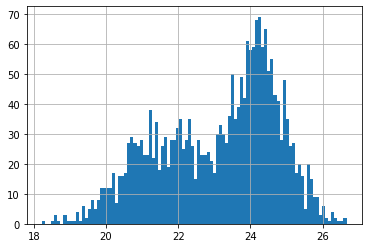

In [22]:
df_Guatemala['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 23 y 25. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 2013

In [35]:
series_Gt = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)
series_Gt = series_Gt[series_Gt['Country']=='Guatemala']
series_Gt

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1825-01-01,21.204,1.770,Guatemala
1825-02-01,21.584,1.374,Guatemala
1825-03-01,23.038,1.704,Guatemala
1825-04-01,25.276,1.923,Guatemala
1825-05-01,24.995,1.276,Guatemala
...,...,...,...
2013-05-01,25.704,0.461,Guatemala
2013-06-01,25.048,0.403,Guatemala
2013-07-01,24.588,0.316,Guatemala


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

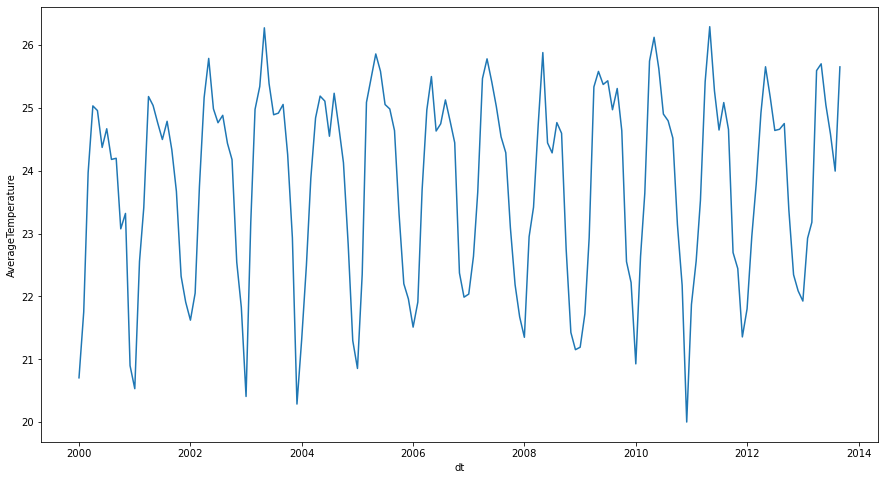

In [36]:
# Eliminamos la columna de AverageTemperatureUncertainty
temp = series_Gt.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

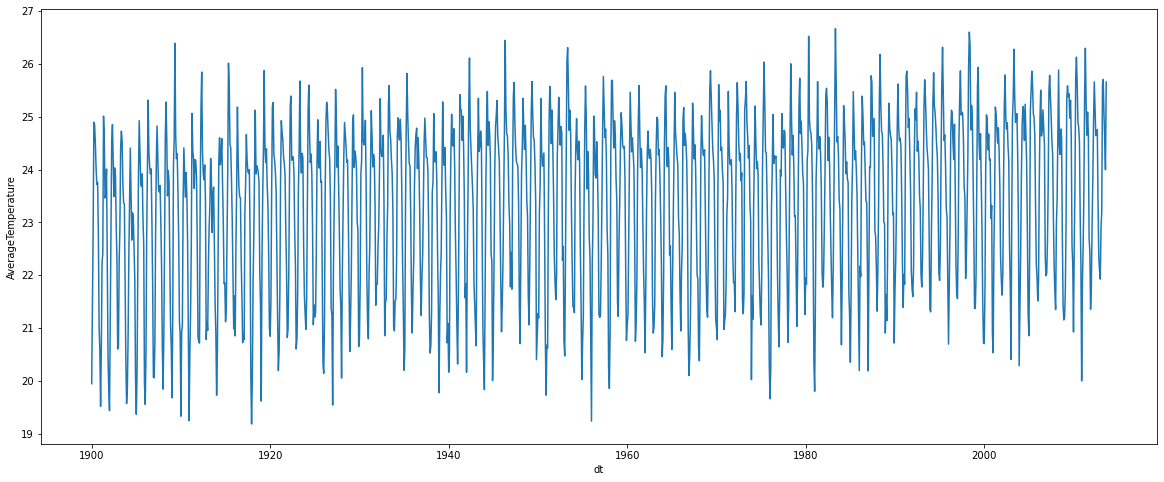

In [37]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


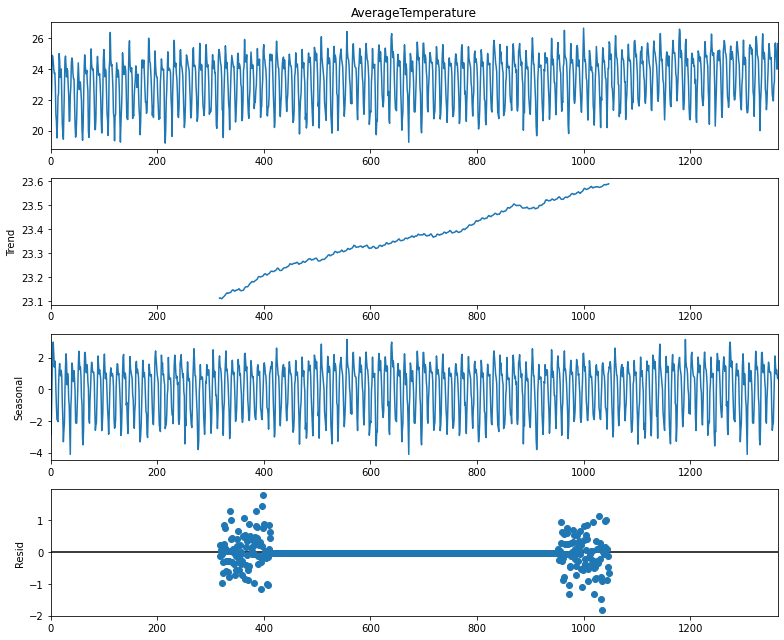

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [41]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

#Se cmabio el numero de periodo por la cantidad de observaciones existenes para Guatemlaa
decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=635)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [42]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [43]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [44]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [45]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [46]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [47]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [ ]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
mundial

In [ ]:

nombre = 'AverageTemperature'
encontrar_mejor_solucion(mundial, nombre, metodo = "sarima")


Tamaño Entrenamiento 42
Tamaño Prueba 3
Encontrando la mejor solución para sarima


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [ ]:
df2_Gt = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [ ]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2_Gt)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

,ds
76,2016-05-01
77,2016-06-01
78,2016-07-01
79,2016-08-01
80,2016-09-01


Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2016-05-01,22.044214,21.473403,22.630269
77,2016-06-01,23.170340,22.583641,23.725494
78,2016-07-01,23.912832,23.351093,24.531911
79,2016-08-01,23.929102,23.325569,24.555299
80,2016-09-01,22.771931,22.127316,23.365535


Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

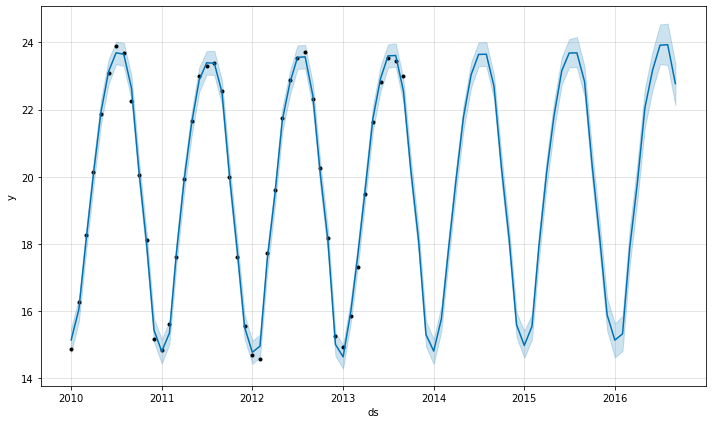

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

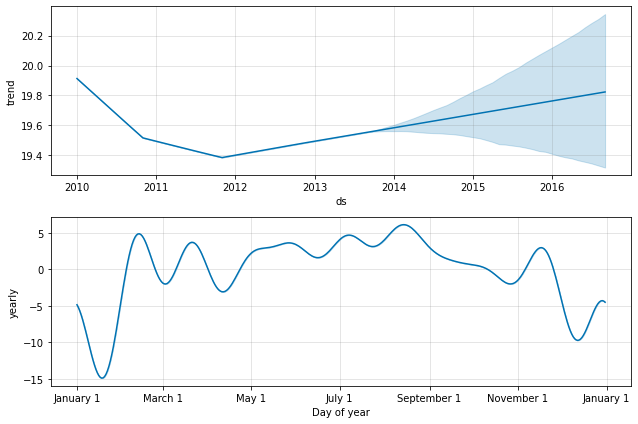

In [26]:
mi_modelo.plot_components(prediccion);